# Hands on practice with neural network

### Some [types of neural networks](https://www.asimovinstitute.org/neural-network-zoo/)

- Classic - what we did this morning
- Auto-encoder (like PCA finding compressed representation) - now

the hidden layer is an encoding of the generalization
- Convolutional neural networks - tomorrow
- Recurrent neural network - Thursday


![](./img/autorec.png)

![](./img/CNN.png)

![](./img/RNN.png)

### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](./img/keras_2.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

## Wait, what's TensorFlow?


## Tensors are generalized matricies

<img src="img/tensors.png" width=550>

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

<img src="img/cat-tensors.gif" width=550>

### Building our first Neural Network - Auto-encoder

In [1]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.1.0'

In [4]:
!pip show tensorflow

Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.7/site-packages
Requires: tensorboard, protobuf, keras-applications, keras-preprocessing, absl-py, tensorflow-estimator, scipy, opt-einsum, numpy, wrapt, astor, termcolor, gast, six, google-pasta, grpcio, wheel
Required-by: 


In [5]:
!pip freeze | grep tensorflow

tensorflow==2.1.0
tensorflow-estimator==2.1.0


In [49]:
# Bring in absolute garbage random data
import numpy as np
X_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
X_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical( np.random.randint(10, size=(100, 1)), num_classes=10)

In [50]:
X_train[0].shape

(20,)

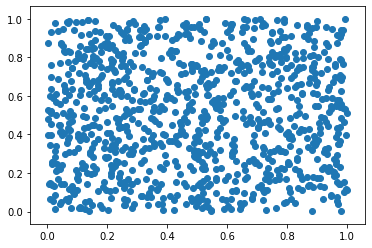

In [51]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1])

In [52]:
y_train[:10]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [53]:
# initialize the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
model = Sequential()

In [54]:
# Adding layers --> simple as .add()
# Dense means linear layer + activation
model.add(Dense(units=64, activation='relu', input_shape=X_train[0].shape))
model.add(Dense(units=10, activation='softmax'))

In [55]:
# Output layer activation functions:
#  - linear regression: 'linear'
#  - binary classification: 'sigmoid'
#  - multi class classification: 'softmax'

In [56]:
(20+1)*64

1344

In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 1,994
Trainable params: 1,994
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Option I - gradient descent
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['mae', 'acc'])

# Option II - adadelta
# model.compile(optimizer='adadelta', loss='binary_crossentropy')

<table>
<tr>
<td><img src="https://ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif" width=350></td>
<td><img src="https://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif" width=350></td>
<tr>
<table>

<a href="https://keras.io/optimizers/">more optimizers</a>

In [61]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(min_delta=10e-5, patience=2)]

In [62]:
# Training the model!
history = model.fit(X_train, y_train,
                    batch_size=100, epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=my_callbacks)

Train on 1000 samples, validate on 100 samples
Epoch 1/20
1000/1000 [==============================] - 0s 21us/sample - loss: 2.2984 - mae: 0.1796 - acc: 0.1270 - val_loss: 2.3216 - val_mae: 0.1801 - val_acc: 0.0800
Epoch 2/20
1000/1000 [==============================] - 0s 18us/sample - loss: 2.2949 - mae: 0.1795 - acc: 0.1320 - val_loss: 2.3216 - val_mae: 0.1801 - val_acc: 0.0900
Epoch 3/20
1000/1000 [==============================] - 0s 15us/sample - loss: 2.2919 - mae: 0.1795 - acc: 0.1290 - val_loss: 2.3189 - val_mae: 0.1801 - val_acc: 0.0900
Epoch 4/20
1000/1000 [==============================] - 0s 19us/sample - loss: 2.2896 - mae: 0.1794 - acc: 0.1270 - val_loss: 2.3186 - val_mae: 0.1801 - val_acc: 0.0800
Epoch 5/20
1000/1000 [==============================] - 0s 21us/sample - loss: 2.2869 - mae: 0.1794 - acc: 0.1260 - val_loss: 2.3232 - val_mae: 0.1802 - val_acc: 0.1000
Epoch 6/20
1000/1000 [==============================] - 0s 27us/sample - loss: 2.2845 - mae: 0.1793 - acc: 0

In [24]:
# Results of the model over epochs
history.history['val_loss']

[2.3346166610717773,
 2.326256036758423,
 2.322671413421631,
 2.32087779045105,
 2.3197476863861084,
 2.3219127655029297,
 2.3192737102508545,
 2.3169519901275635,
 2.3176167011260986,
 2.3163082599639893,
 2.3167808055877686,
 2.3176498413085938,
 2.3178486824035645,
 2.317972421646118,
 2.3177781105041504,
 2.316187858581543,
 2.3180582523345947,
 2.3182179927825928,
 2.318457841873169,
 2.3189940452575684]

In [25]:
history.history['loss']

[2.3572395648956297,
 2.3245755672454833,
 2.3091239013671876,
 2.3013069496154785,
 2.296658702850342,
 2.2935653076171874,
 2.28902467918396,
 2.285872413635254,
 2.283095325469971,
 2.2798927383422853,
 2.277015691757202,
 2.2742938919067384,
 2.2712085247039795,
 2.2689510402679445,
 2.265520709991455,
 2.2638004150390625,
 2.2606565666198732,
 2.257946767807007,
 2.2557239379882814,
 2.2524431228637694]

In [ ]:
model.summary()

In [26]:
# Evaluate
loss_and_metrics = model.evaluate(X_test, y_test)

100/100 [==============================] - 0s 49us/sample - loss: 2.3190 - mae: 0.1800 - acc: 0.1100


In [27]:
loss_and_metrics

[2.3189941310882567, 0.17995101, 0.11]

In [34]:
# Useful
from tensorflow.keras.models import load_model
model.save('./model.h5')  # Save your weights and computational graph


In [36]:
new_model = load_model('./model.h5')  # loading the saved model from above

In [37]:
keras.__version__

'2.2.4-tf'

In [38]:
!ls -lah

total 296
drwxr-xr-x   7 enkeboll  staff   224B Aug 11 13:23 .
drwxr-xr-x   7 enkeboll  staff   224B Aug 11 12:11 ..
-rw-r--r--@  1 enkeboll  staff   6.0K Aug 11 12:32 .DS_Store
drwxr-xr-x   3 enkeboll  staff    96B Aug 11 13:01 .ipynb_checkpoints
drwxr-xr-x  16 enkeboll  staff   512B Oct  7  2019 img
-rwxr-xr-x   1 enkeboll  staff    87K Aug 11 13:23 intro-to-keras.ipynb
-rw-r--r--   1 enkeboll  staff    49K Aug 11 13:23 model.h5


In [40]:
from tensorflow.keras.applications.vgg16 import VGG16

In [41]:
model = VGG16(weights='imagenet', include_top=False)
model.save('./vgg16.h5')

In [42]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [43]:
ls -lath

total 115376
-rw-r--r--   1 enkeboll  staff    56M Aug 11 13:23 vgg16.h5
drwxr-xr-x   8 enkeboll  staff   256B Aug 11 13:23 ./
-rw-r--r--   1 enkeboll  staff    49K Aug 11 13:23 model.h5
-rwxr-xr-x   1 enkeboll  staff    87K Aug 11 13:23 intro-to-keras.ipynb*
drwxr-xr-x   3 enkeboll  staff    96B Aug 11 13:01 .ipynb_checkpoints/
-rw-r--r--@  1 enkeboll  staff   6.0K Aug 11 12:32 .DS_Store
drwxr-xr-x   7 enkeboll  staff   224B Aug 11 12:11 ../
drwxr-xr-x  16 enkeboll  staff   512B Oct  7  2019 img/


### Your exercise:  Image reconstruction using auto-encoder

##### Import dataset - Mnist (handwritten digits)

In [63]:
import os

In [64]:
import matplotlib.pyplot as plt

In [65]:
# keras imports for the dataset and building our neural network
from tensorflow.keras.datasets import mnist

Steps:
 - Load the Mnist dataset and split to train/test (use mnist.load_data())
 - Plot few images with their label
 - reshape images to 784 dim vector and normalize (divide by 255)
    - also, one-hot encode y variable using keras.utils.to_categorical
 - Create a new model with 1 Dense layers sized 32 (encoder) with relu layer.
    - Then add a dense layer sized 784 with sigmoid activation.
    - Run it for 50 epochs with batches of 256. Use binary cross-entropy.
 - Plot the model loss
 - Use predict to encode and decode x_test

In [66]:
# a. Load the Mnist dataset and split to train/test (use mnist.load_data())
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [67]:
x_train.shape

(60000, 28, 28)

6


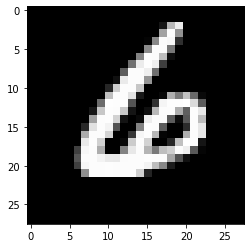

In [74]:
# b. Plot few images with their label
num = 2345
print(y_train[num])
plt.imshow(x_train[num], cmap='gray')

In [75]:
x_train[num]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 183, 236,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 162, 252, 147,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   4, 136, 251, 247,  47,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 139, 252, 252, 119,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [80]:
# c. reshape images to 784 dim vector and normalize (divide by 255)
# also, one-hot encode y variable using keras.utils.to_categorical
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [81]:
x_train.shape

(60000, 784)

In [82]:
x_test.shape

(10000, 784)

In [83]:
x_train = x_train / 255.
x_test = x_test / 255.

In [86]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [88]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [89]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [90]:
# d. Create a new model with 1 Dense layers sized 32 (encoder) with relu layer.
# Then add a dense layer sized 784 with sigmoid activation.
# Run it for 50 epochs with batches of 256. Use binary cross-entropy.
model = Sequential()
model.add(Dense(784, activation='sigmoid', input_shape=x_train[0].shape))

In [91]:
model.add(Dense(10, activation='softmax'))

In [92]:
model.compile(optimizer='Adam',
              metrics=['accuracy'],
              loss='categorical_crossentropy')

In [94]:
history = model.fit(x_train, y_train,
                    epochs=50, batch_size=256,
                    validation_data=(x_test, y_test),
                    callbacks=my_callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0744 - accuracy: 0.9790 - val_loss: 0.0906 - val_accuracy: 0.9732
Epoch 2/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0657 - accuracy: 0.9816 - val_loss: 0.0924 - val_accuracy: 0.9713
Epoch 3/50
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0583 - accuracy: 0.9838 - val_loss: 0.0826 - val_accuracy: 0.9746
Epoch 4/50
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0515 - accuracy: 0.9855 - val_loss: 0.0765 - val_accuracy: 0.9770
Epoch 5/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0457 - accuracy: 0.9876 - val_loss: 0.0775 - val_accuracy: 0.9763
Epoch 6/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0406 - accuracy: 0.9890 - val_loss: 0.0732 - val_accuracy: 0.9782
Epoch 7/50
60000/60000 [==============================] 

In [96]:
# e. Plot the model loss
# f. Use predict to encode and decode x_test
loss = history.history['loss']
val_loss = history.history['val_loss']

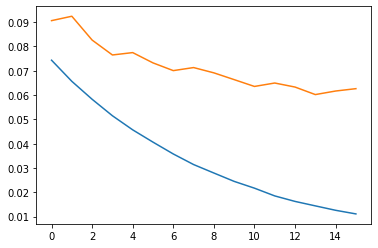

In [97]:
plt.plot(range(len(loss)), loss)
plt.plot(range(len(loss)), val_loss)
plt.show()

In [99]:
model.predict(x_test[0:1, :])

array([[1.0246522e-08, 4.4901704e-11, 1.6094112e-06, 2.3622683e-04,
        1.4136665e-10, 5.2565525e-08, 2.5956524e-13, 9.9976009e-01,
        2.0507139e-07, 1.8562780e-06]], dtype=float32)

In [100]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)